Meu computador, meu laboratório
===============================



## Objetivo



Elabore uma pergunta/hipótese e teste ela usando um experimento computacional. Mostre graficamente um histograma dos resultados obtidos nas suas simulações e discuta se conseguiu responder sua pergunta/hipótese. Tente ser criativo e realizar um experimento suficientemente diferente dos realizados em sala.

Sugestões de situações/processos para simular:

-   Baralho de cartas (ex: qual a chance de sortear 5 cartas do mesmo naipe ou qual a chance sortear 3 cartas em ordem crescente. Pode pensar em aplicações em jogos como Poker ou Truco pois, afinal, a probabilidade nasceu nos jogos de azar);
-   Jogos de tabuleiros (pensar em estratégias de otimização assim como as discutidas sobre o jogo Catan em aula);
-   Datas de aniversário (ex: qual chance de pelo menos duas pessoas fazerem aniversário no mesmo dia num grupo de $n$ pessoas)

Escolha o experimento que preferir, não precisa se limitar às sugestões.

## Estimando $\pi$ com a simulação de Monte Carlo

<p style='text-align: justify'> A simulação de Monte Carlo é um método estatístico que utilza amostragens aleatórias para tratar de problemas determinísticos. $[1]$
    
<p style='text-align:justify'> Para o experimento, pensamos em usar a simulação de Monte Carlo para estimar o valor de $\pi$. Com isso, o experimento é baseado na proporção de áreas entre um círculo inscrito em um quadrado e o próprio quadrado. Além disso, o lado $L$ do quadrado pode ser relacionado com o raio $R$ como $L = 2R$. Assim, a área do quadrado $S$ pode ser escrita como $S = L^2 = 4R^2$. Ademais, a área do círculo $A$ pode ser expressa como $A = \pi R^2$. Podemos então definir $\pi$ como:
    $$\pi = 4\frac{A}{S}$$
Dessa forma, utilizamos a simulação de Monte Carlo para computar uma amostragem aleatória de $n$ pontos dentro do quadrado e, com isso, calcular $\pi$ a partir da Equação acima, porém, tomando $A$ e $S$ como a quantidade de pontos dentro do círculo e a quantidade de pontos dentro do quadrado, respectivamente.

<p style='text-align:justify'> A partir disso, formulamos a hipótese de que, conforme o número $n$ de pontos aumenta, a precisão da estimativa também aumentará.

## Imports e funções

<p style='text-align:justify'> Para realizar o experimento, precisamos dos módulos <code>numpy</code>, <code>random</code> e <code>matplotlib</code>. Assim, também definimos funções para calcular a distância euclidiana dos pontos até a origem (centro do círculo) e também uma função que realize a função de Monte Carlo.

In [5]:
import numpy as np
import random
from matplotlib import pyplot as plt


def distancia_origem(array):
    """Calcula a distância de pontos até a origem
    
    A partir de um array bidimensional, a função calcula a distância 
    euclidiana até a origem.
    
    Args:
        array: array 2D que corresponde às coordenadas x e y.
    
    Returns:
        A distância euclidiana até a origem dos pontos x e y.
    
    """
    distancia_ao_quadrado = array[0]** 2 + array[1]**2
    distancia = np.sqrt(distancia_ao_quadrado)
    return(distancia)


def pi_montecarlo(num_pontos):
    """Realiza a simulação de Monte Carlo e a estimativa de pi
    
    A função, a partir de um número de pontos, correspondente ao número da 
    amostragem aleatória, estima o valor de pi.
    
    Args:
        num_pontos: número de pontos que serão amostrados.
        
    Returns:
        O valor de pi da estimativa.
    
    """
    pontos = np.random.uniform(low=-1, high=1, size=(num_pontos,2))
    contador = 0
    for i in pontos:
        distancia = distancia_da_origem(i)
        if distancia < 1:
            contador = contador + 1
    pi = 4*(contador/num_pontos)
    return(pi)

<p style='text-align:justify'> Explicando a função <code>pi_montecarlo</code>, ela gera uma quantidade de pontos em um array 2D definida pelo argumento <code>num_pontos</code>, com valores compreendidos entre -1 e 1. Esse intervalo foi definido imaginando um quadrado inserido no plano cartesiano, com vértices nas coordenadas $(1,1)$, $(1, -1)$, $(-1, 1)$ e $(-1, -1)$. Assim, o array gerado percorre um loop <i>for</i>, no qual as distâncias euclidianas de cada par de coordenadas em relação a origem são calculadas pela função <code>distancia_origem</code>. Por fim, caso a distância computada seja menor que 1 (ou seja, o ponto está dentro do círculo) aumentamos uma unidade no contador definido no começo do escopo da função. Por fim, implementamos a equação que estima $\pi$ e retornamos-o.

<i>Observação: parte da lógica da função da simulação de Monte Carlo foi retirada do vídeo na referência $[2]$.</i>

## Execução do experimento

<p style='text-align:justify'> Na execução do experimento, definimos para $n$ os valores presentes em <code>array_de_pontos</code> e também calculamos esses valores em escala logarítimica $[3]$, para facilitar a visualização de $n$ no gráfico. Então, criamos um loop que itere sobre a lista contendo os valores de $n$, criamos uma variável para armazenar cada valor estimado de $\pi$ e também criamos uma lista (antes do loop) que abrigue o erro entre o valor de $\pi$ estimado e $\pi$ real. Assim usando as funções do módulo <code>matplotlib</code>, plotamos um gráfico de barras para exibir os resultados do nosso experimento, que seriam mostrados a partir da relação entre a diferença de $\pi$ estimado e $\pi$. Contudo, sabemos que, originalmente, deveriamos usar um histograma para analisar esse resultado, mas um histograma computa dados apenas vindo de uma variável no eixo $x$, diferente do gráfico de barras, que possui semelhanças visuais, mas acomoda variáveis no eixos $x$ e $y$.

Para a simulação de Monte Carlo com 10 pontos, obtivemos π como 3.6
A diferença entre a estimativa de π e π é: 0.458407346410207

Para a simulação de Monte Carlo com 100 pontos, obtivemos π como 3.04
A diferença entre a estimativa de π e π é: 0.10159265358979308

Para a simulação de Monte Carlo com 1000 pontos, obtivemos π como 3.06
A diferença entre a estimativa de π e π é: 0.08159265358979306

Para a simulação de Monte Carlo com 10000 pontos, obtivemos π como 3.1316
A diferença entre a estimativa de π e π é: 0.009992653589792955

Para a simulação de Monte Carlo com 100000 pontos, obtivemos π como 3.14504
A diferença entre a estimativa de π e π é: 0.0034473464102067197

Para a simulação de Monte Carlo com 1000000 pontos, obtivemos π como 3.144488
A diferença entre a estimativa de π e π é: 0.002895346410206834

Para a simulação de Monte Carlo com 10000000 pontos, obtivemos π como 3.1424568
A diferença entre a estimativa de π e π é: 0.0008641464102070451



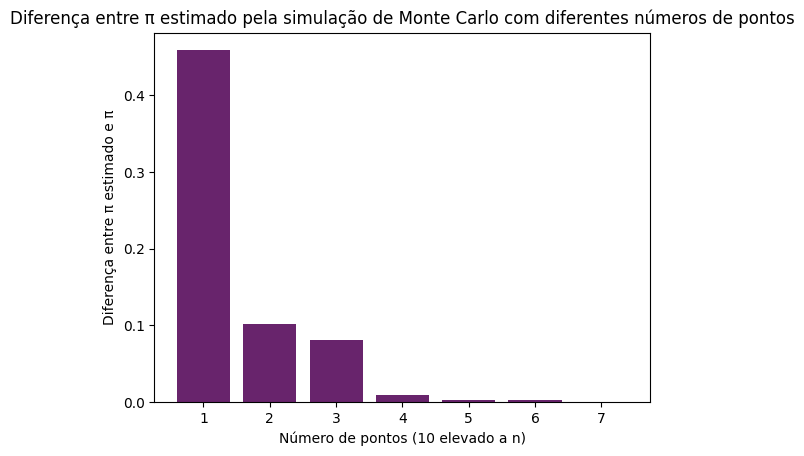

In [24]:
array_de_pontos = [10,100,1000,10000,100000,1000000,10000000]
array_de_pontos_log = []


for num_pontos in array_de_pontos:
    log = np.log10(num_pontos)
    log = int(log)
    array_de_pontos_log.append(log)
    

array_erros = []

for num_pontos in array_de_pontos:
    pi_estimado = pi_montecarlo(num_pontos)
    print(f"Para a simulação de Monte Carlo com {num_pontos} pontos, obtivemos π como {pi_estimado}")
    diferenca = abs(pi_estimado - np.pi)
    array_erros.append(diferenca)
    print(f"A diferença entre a estimativa de π e π é: {diferenca}")
    print()
    

plt.bar(array_de_pontos_log,array_erros, color='#68246c')
plt.xlabel('Número de pontos (10 elevado a n)') 
plt.ylabel('Diferença entre π estimado e π') 
plt.title("Diferença entre π estimado pela simulação de Monte Carlo com diferentes números de pontos")

plt.show()

## Resultado e discussão



<p style='text-align: justify'> Retomando nossa hipótese, esperavámos que a estimativa de $\pi$ se tornasse cada vez mais precisa conforme o número de valores $n$ da amostragem aumentasse. Conforme o gráfico acima mostrou, a estimativa de $\pi$ se torna sim cada vez mais próxima do valor verdadeiro de $\pi$. Contudo, é preciso observar que esse resultado pode variar conforme o código é rodado. Entretanto, essa inconcistência não é matemática, ou teórica, e sim consequência das amostragens aleatórias que são geradas, já que seria possível obter amostras contendo a proporção certa entre pontos dentro e fora do círculo que resultassem perto do valor de $\pi$.

<p style='text-align: justify'> Apesar disso, seria possível contornar esse problema de flutuação da amostragem fazendo o experimento diversas vezes e tirando uma média da estimativa em cada caso, o que resultaria no comportamento formulado na hipótese.

## Referências



Escreva nesta seção as referências consultadas.



$[1]$ https://pt.wikipedia.org/wiki/Método_de_Monte_Carlo

$[2]$ https://www.youtube.com/watch?v=x7M1Q9US-5s##

$[3]$ https://stackoverflow.com/questions/25169297/numpy-logarithm-with-base-n

## Playground

